# NBA Player Salary Exploration by Game Statistics
By. Jaedin Hernandez-Rogers

In [5]:
# Import required libraries
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from  scipy.stats import f_oneway
import pandas as pd
import numpy as np

In [6]:
# Read dataset csv
hoop_data = pd.read_csv('/Users/jaedin/Downloads/nba22-23salary+stats.csv')

## Data Cleaning:

In [7]:
# Deleting unnecessary data columns
hd = hoop_data.drop(['USG%','OWS','DWS','WS','WS/48','OBPM',
                    'DBPM','BPM','VORP','TOV%','BLK%','STL%','AST%',
                    'TRB%','DRB%','ORB%','FTr','FT','FTA','3PA','2PA',
                    'PF','Total Minutes','3PAr','GP','Team', 'FT%',
                    'eFG%','GS', 'FG','FGA'], axis = 1)
hd = hd.drop(hd.columns[0], axis=1)

In [8]:
print(hd.columns)

Index(['Player Name', 'Salary', 'Position', 'Age', 'MP', 'FG%', '3P', '3P%',
       '2P', '2P%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS',
       'PER', 'TS%'],
      dtype='object')


In [9]:
# Locate rows with missing values
hd.loc[hd.isnull().any(axis=1)]

,Player Name,Salary,Position,Age,MP,FG%,3P,3P%,2P,2P%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,PER,TS%
75,Mitchell Robinson,17045454,C,24,27.0,0.671,0.0,NaN,3.2,0.671,4.5,4.9,9.4,0.9,0.9,1.8,0.7,7.4,18.9,0.652
133,Mason Plumlee,9080417,C,32,26.0,0.680,0.0,NaN,4.2,0.680,2.9,6.0,8.9,3.1,0.6,0.6,1.5,10.8,19.6,0.689
233,Mark Williams,3722040,C,21,19.3,0.637,0.0,NaN,3.7,0.637,2.2,4.9,7.1,0.4,0.7,1.0,0.9,9.0,19.8,0.659
264,Bismack Biyombo,2905851,C,30,14.3,0.578,0.0,NaN,2.0,0.578,1.5,2.8,4.3,0.9,0.3,1.4,0.8,4.3,14.4,0.555
301,Udoka Azubuike,2174880,C,23,10.0,0.819,0.0,NaN,1.6,0.819,0.9,2.4,3.3,0.3,0.2,0.4,0.5,3.5,16.1,0.774
332,Daniel Gafford,1930681,C,24,20.6,0.732,0.0,NaN,3.7,0.732,2.1,3.5,5.6,1.1,0.4,1.3,1.1,9.0,19.7,0.739
395,Moses Brown,824041,C,23,8.2,0.635,0.0,NaN,1.7,0.635,1.6,2.3,3.9,0.1,0.1,0.4,0.4,4.3,22.2,0.607
403,Trevor Keels,520589,SG,19,2.7,0.250,0.3,0.250,0.0,NaN,0.0,0.7,0.7,0.0,0.0,0.0,0.0,1.0,3.7,0.375
404,Dereon Seabron,511816,SG,22,2.4,0.400,0.0,NaN,0.4,0.400,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.8,4.6,0.400
421,Neemias Queta,508891,C,23,5.8,0.667,0.0,NaN,1.2,0.667,1.0,1.2,2.2,0.2,0.0,0.4,0.2,2.4,17.0,0.607


In [10]:
# Drop rows with missing values
hd_clean = hd.dropna()

In [11]:
# Check for more null values
hd_clean.loc[hd.isnull().any(axis=1)]

,Player Name,Salary,Position,Age,MP,FG%,3P,3P%,2P,2P%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,PER,TS%


In [12]:
# Drop players making less than 500k
hd_clean = hd_clean[hd_clean['Salary']>500000]    

In [13]:
# Check for duplicated rows
hd_clean[hd_clean.duplicated()]

,Player Name,Salary,Position,Age,MP,FG%,3P,3P%,2P,2P%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,PER,TS%


In [14]:
# Include only rows with a single position listed
hd_clean = hd_clean[hd_clean['Position'].str.len() < 3]

## Data Exploration

In [15]:
# Summary statistics for each column
hd_clean.describe()

,Salary,Age,MP,FG%,3P,3P%,2P,2P%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,PER,TS%
count,4.110000e+02,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,9.199416e+06,25.927007,20.589538,0.463569,1.046959,0.326805,2.466910,0.533591,0.878589,2.759854,3.637470,2.176642,0.627007,0.383455,1.153771,9.585401,13.348175,0.563088
std,1.090896e+07,4.380057,9.197179,0.088741,0.872232,0.118638,2.021162,0.113421,0.720792,1.709834,2.262636,1.939434,0.368948,0.355883,0.833479,6.937890,4.932650,0.079976
min,5.030410e+05,19.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,1.982946e+06,23.000000,13.000000,0.419000,0.400000,0.298500,1.000000,0.486500,0.400000,1.500000,2.100000,0.800000,0.300000,0.200000,0.600000,4.650000,10.300000,0.525500
50%,4.343919e+06,25.000000,19.600000,0.454000,0.900000,0.346000,1.800000,0.535000,0.700000,2.400000,3.200000,1.400000,0.600000,0.300000,0.900000,7.800000,13.000000,0.567000
75%,1.142861e+07,29.000000,28.550000,0.500500,1.550000,0.387000,3.300000,0.586500,1.100000,3.600000,4.600000,2.900000,0.800000,0.500000,1.500000,12.400000,16.150000,0.607000
max,4.807001e+07,42.000000,37.400000,0.776000,4.900000,1.000000,10.500000,1.000000,5.100000,9.600000,12.500000,10.700000,1.900000,2.500000,4.100000,33.100000,31.400000,0.833000


From our summary statistics, we notice that the top 25% of NBA player salaries are significantly more valuable than the other 75% with the top 25% lying between 11.6M and 48.07M with a 27 million dollar difference. The bottom 50%, however, earn between 500,000 and 4.4M with a difference of approximatly 3.9 million USD.

In [16]:
# Create 'STOCKS' and 'STOCKS/Min' variables
hd_clean['STOCKS'] = hd_clean['STL'] + hd_clean['BLK']
hd_clean['STOCKS/Min'] = ((hd_clean['STL'] + hd_clean['BLK'])/hd_clean['MP'])

#### Adding 'Income' variable to compare salary ranges to game statistics with salary mean + 1 SD being 'high', salary mean being 'mid', and lower than the mean being 'low'

In [17]:
# Loop through Salary variable to assign income  value
for USD in hd_clean['Salary']:
    if USD >= (10759640+(hd_clean['Salary'].mean())):
        hd_clean.loc[hd_clean['Salary'] == USD, 'Income'] = 'High'
    elif USD >= hd_clean['Salary'].mean():
        hd_clean.loc[hd_clean['Salary'] == USD, 'Income'] = 'Mid'
    else:
        hd_clean.loc[hd_clean['Salary'] == USD, 'Income'] = 'Low'


In [25]:
# Comparing average salary over income levels
HighSalary = hd_clean.loc[hd_clean['Income'] == 'High', 'Salary'].mean()
MidSalary = hd_clean.loc[hd_clean['Income'] == 'Mid', 'Salary'].mean()
LowSalary = hd_clean.loc[hd_clean['Income'] == 'Low', 'Salary'].mean()
print('High Income Salary:' ,HighSalary)
print('Mid Income Salary:' ,MidSalary)
print('Low Income Salary:' ,LowSalary)

High Income Salary: 32573965.644067798
Mid Income Salary: 13474333.220588235
Low Income Salary: 3319864.0809859154


In [19]:
# Comparing PER rating over income levels
HighPER = hd_clean.loc[hd_clean['Income'] == 'High', 'PER'].mean()
MidPER = hd_clean.loc[hd_clean['Income'] == 'Mid', 'PER'].mean()
LowPER =  hd_clean.loc[hd_clean['Income'] == 'Low', 'PER'].mean()

print('High Income PER:',HighPER)
print('Mid Income PER:',MidPER)
print('Low Income PER:', LowPER)

High Income PER: 19.27457627118644
Mid Income PER: 14.214705882352943
Low Income PER: 11.909507042253521


In [20]:
HighTS = hd_clean.loc[hd_clean['Income'] == 'High', 'TS%'].mean()
MidTS = hd_clean.loc[hd_clean['Income'] == 'Mid', 'TS%'].mean()
LowTS = hd_clean.loc[hd_clean['Income'] == 'Low', 'TS%'].mean()

print(f'High Income TS:{HighTS: 2%}')
print(f'Mid Income TS: {MidTS: 2%}')
print(f'Low Income TS: {LowTS: 2%}')

High Income TS: 59.577966%
Mid Income TS:  57.916176%
Low Income TS:  55.244718%


In [21]:
HighSTOCKS = hd_clean.loc[hd_clean['Income'] == 'High', 'STOCKS'].mean()
MidSTOCKS = hd_clean.loc[hd_clean['Income'] == 'Mid', 'STOCKS'].mean()
LowSTOCKS = hd_clean.loc[hd_clean['Income'] == 'Low', 'STOCKS'].mean()

print('High Income STOCKS:',HighSTOCKS)
print('Mid Income STOCKS:',MidSTOCKS)
print('Low Income STOCKS:',LowSTOCKS)

High Income STOCKS: 1.5627118644067794
Mid Income STOCKS: 1.2249999999999999
Low Income STOCKS: 0.8443661971830986


In [22]:
HighStkPerMin = hd_clean.loc[hd_clean['Income'] == 'High', 'STOCKS/Min'].mean()
MidStkPerMin = hd_clean.loc[hd_clean['Income'] == 'Mid', 'STOCKS/Min'].mean()
LowStkPerMin = hd_clean.loc[hd_clean['Income'] == 'Low', 'STOCKS/Min'].mean()

print('High Income STOCKS/Min:',HighStkPerMin)
print('Mid Income STOCKS/Min:',MidStkPerMin)
print('Low Income STOCKS/Min:',LowStkPerMin)

High Income STOCKS/Min: 0.04799545228686571
Mid Income STOCKS/Min: 0.049988030998849395
Low Income STOCKS/Min: 0.051168953736675925


### Income Level Analysis

As we observe shooting and effeciency statistics in regards to player salary level, we notice the logical trend of high income players having the best performance numbers, followed by mid level and low level income having the least impressive statistics. While this might be true for offensive stats, we notice that defense may require further observation.

For our STOCKS (steals+blocks) catagory, we initially notice that our initial observation follows the previous trend of high, mid, then low income levels having the most impressive statistics. However, once we take a closer look at STOCKS per minute instead of totals, our income level pattern is broken with mid income levels being the most effective on the defensive side of the floor, followed by low income, with high income comfortably behind our other levels.

### ANOVA

In [26]:
# Perform One-Way ANOVA on player salary by position
pos_groups = [group['Salary'].values 
          for _, group in hd_clean.groupby('Position')]

f_stat, p_val = f_oneway(*pos_groups)

print(f'F-Statistic = {f_stat}' + f'     P-Value = {p_val}')

F-Statistic = 2.9257349425656756     P-Value = 0.020890142852538582


By performing one-way ANOVA, we notice that there is no statistically significant difference in salary between positions. Our P-value of 0.037 and F-Statistic of 2.57 shows a trend towards a significant variation in salary between positions. We can conclude that there is a difference in mean salary between positons, with marginal variation.

In [34]:
# Assigning salary arrays to corrosponding position
pg_salaries = pos_groups[2]
sg_salaries = pos_groups[4]
sf_salaries = pos_groups[3]
pf_salaries = pos_groups[1]
c_salaries = pos_groups[0]

## Visual Representation

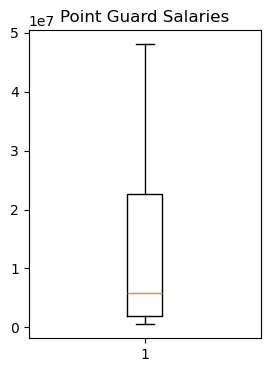

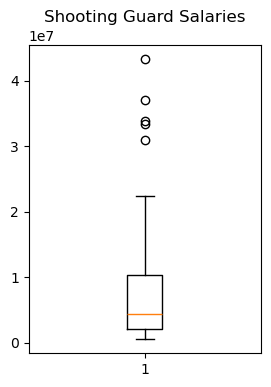

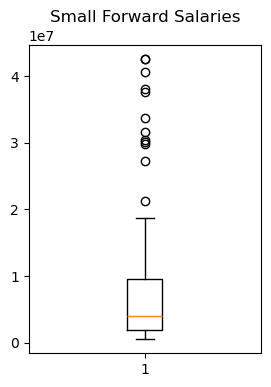

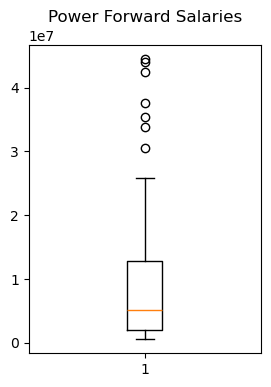

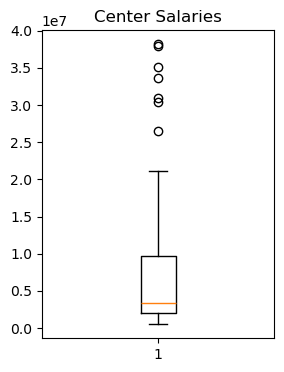

In [35]:
# Salary Spread visualization based on position
plt.figure(figsize = (3,4))
plt.boxplot(pg_salaries)
plt.title('Point Guard Salaries')
plt.show()

plt.figure(figsize = (3,4))
plt.boxplot(sg_salaries)
plt.title('Shooting Guard Salaries')
plt.show()

plt.figure(figsize = (3,4))
plt.boxplot(sf_salaries)
plt.title('Small Forward Salaries')
plt.show()

plt.figure(figsize = (3,4))
plt.boxplot(pf_salaries)
plt.title('Power Forward Salaries')
plt.show()

plt.figure(figsize= (3,4))
plt.boxplot(c_salaries)
plt.title('Center Salaries')
plt.show()
#print(type(pg_salaries))

Based on our box plots for salaries by postion, we notice that the point guard position has the highest density of players in the mid-high salary range. While they appear to have the highest paid players, the mean salary for the point guard position appears to be similar to that of the other positions lying at close to 5 Million. However, even though the mean is similar, we notice that the 3rd quartile is the highest among the different positions reaching closer to 20 million, while none of the other positions 3rd quartile reach 15 million.

This suggests that the point guard position is the most valued position in the NBA, clearing 

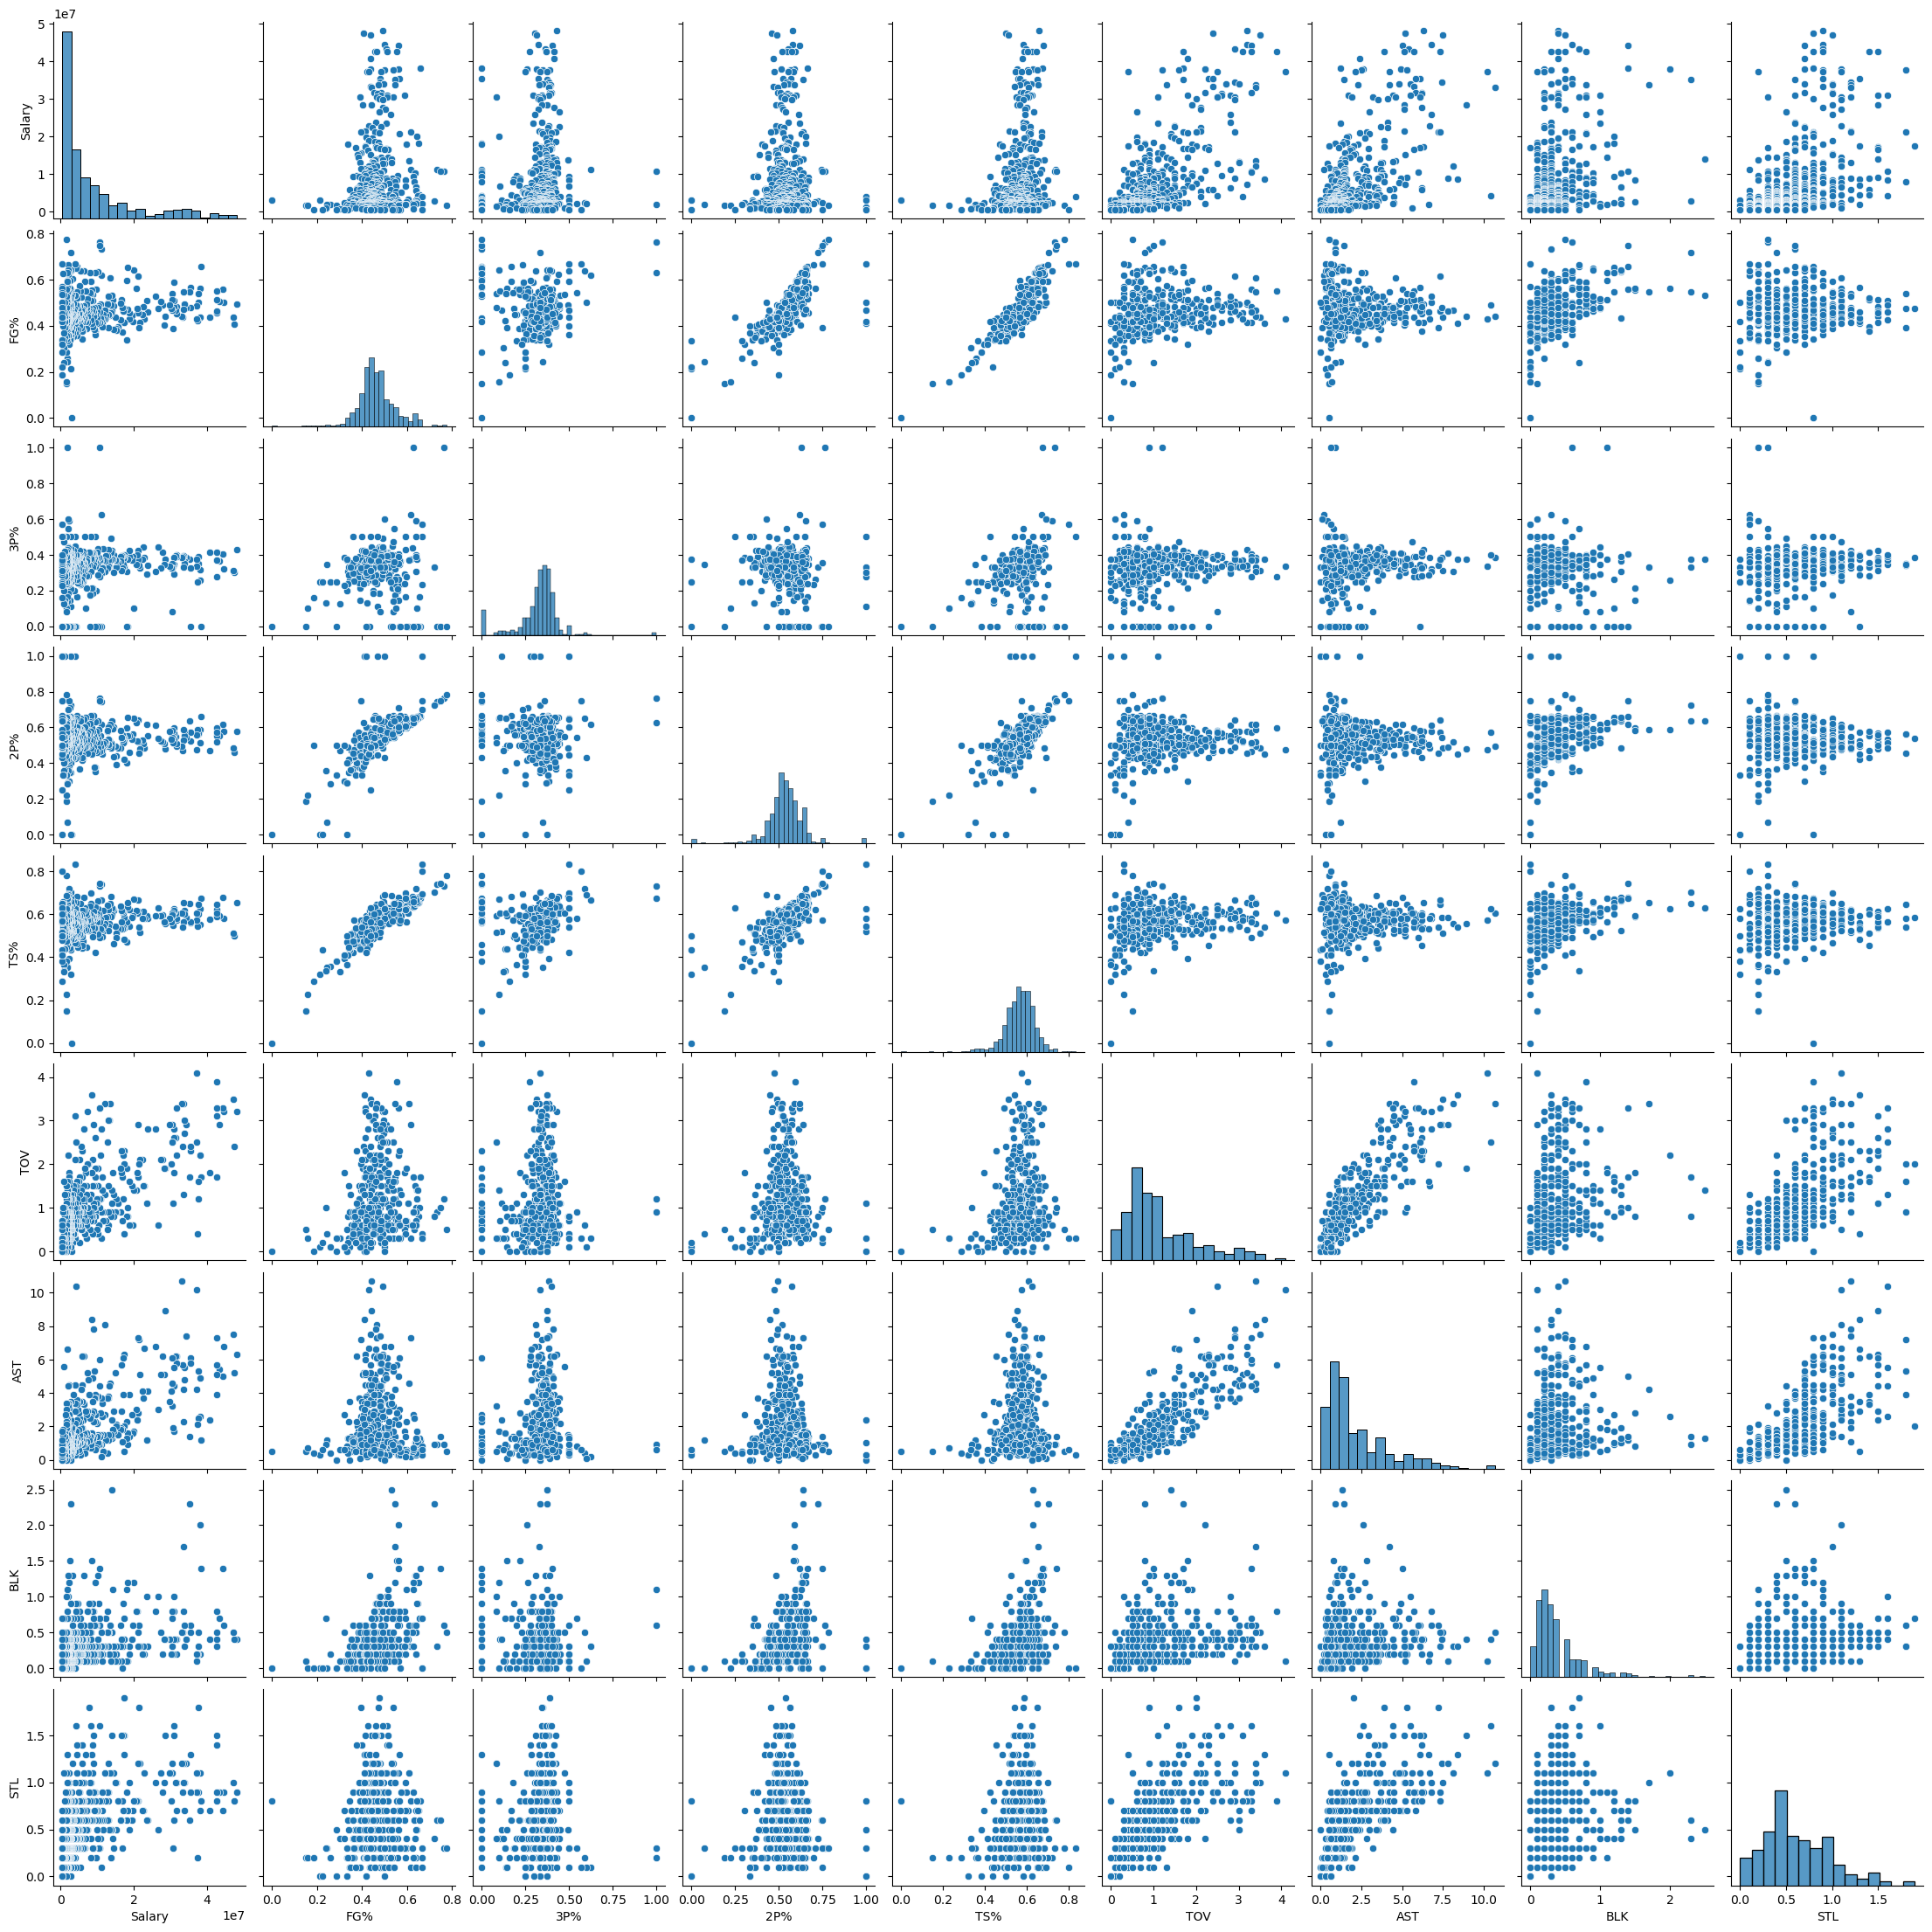

In [31]:
# Exploratory data analysis
sns.pairplot(hd_clean, vars = ['Salary','FG%','3P%', '2P%', 'TS%', 'TOV', 'AST', 'BLK', 'STL'])

plt.show()

## Multiple Regression for Non-Scoring Stats

In [38]:
# Use lower case 'ols'() instead of OLS()
import statsmodels.formula.api as snf

mult_reg = snf.ols('Salary ~ PTS + AST + BLK + STL + ORB + DRB', data = hd_clean)
ar_results = mult_reg.fit()
ar_results.summary(slim = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.550
No. Observations:                 411   F-statistic:                     84.58
Covariance Type:            nonrobust   Prob (F-statistic):           2.70e-68
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.707e+06   8.02e+05     -3.377      0.001   -4.28e+06   -1.13e+06
PTS         7.214e+05   1.01e+05      7.171      0.000    5.24e+05    9.19e+05
AST          1.23e+06   3.25e+05      3.780      0.000     5.9e+05    1.87e+06
BLK         3.361e+06   1.42e+06      2.374      0.018    5.78e+05    6.14e+06
STL        -9.149e+05   1.42e+06     -0.644      0.520   -3.71e+06    1.88e+06
ORB        -1.381e+06   8.29e+05     -1.666      0.097   -3.01e+06    2.49e+05
DRB         1.019e+06   4.53e+05      2.248      0.025    1.28e+05    1.91e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Eliminated STL variable
mult_reg = snf.ols('Salary ~ PTS + AST + BLK + ORB + DRB', data = hd_clean)
ar_results = mult_reg.fit()
ar_results.summary(slim = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.551
No. Observations:                 411   F-statistic:                     101.6
Covariance Type:            nonrobust   Prob (F-statistic):           3.13e-69
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.936e+06   7.18e+05     -4.090      0.000   -4.35e+06   -1.52e+06
PTS         7.109e+05   9.92e+04      7.166      0.000    5.16e+05    9.06e+05
AST         1.131e+06   2.87e+05      3.940      0.000    5.67e+05     1.7e+06
BLK         3.334e+06   1.41e+06      2.358      0.019    5.54e+05    6.11e+06
ORB        -1.459e+06   8.19e+05     -1.781      0.076   -3.07e+06    1.52e+05
DRB         1.037e+06   4.52e+05      2.293      0.022    1.48e+05    1.93e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Eliminated ORB variable
mult_reg = snf.ols('Salary ~ PTS + AST + BLK + DRB', data = hd_clean)
ar_results = mult_reg.fit()
ar_results.summary(slim = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.548
No. Observations:                 411   F-statistic:                     125.5
Covariance Type:            nonrobust   Prob (F-statistic):           1.26e-69
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.145e+06    7.1e+05     -4.429      0.000   -4.54e+06   -1.75e+06
PTS         7.518e+05   9.68e+04      7.770      0.000    5.62e+05    9.42e+05
AST         1.201e+06   2.85e+05      4.210      0.000     6.4e+05    1.76e+06
BLK         2.529e+06   1.34e+06      1.882      0.061   -1.12e+05    5.17e+06
DRB         5.633e+05   3.67e+05      1.536      0.125   -1.58e+05    1.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Eliminated ORB variable
mult_reg = snf.ols('Salary ~ PTS + AST + BLK', data = hd_clean)
ar_results = mult_reg.fit()
ar_results.summary(slim = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.547
No. Observations:                 411   F-statistic:                     166.0
Covariance Type:            nonrobust   Prob (F-statistic):           2.90e-70
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.808e+06   6.76e+05     -4.151      0.000   -4.14e+06   -1.48e+06
PTS         8.271e+05   8.36e+04      9.898      0.000    6.63e+05    9.91e+05
AST         1.219e+06   2.85e+05      4.271      0.000    6.58e+05    1.78e+06
BLK         3.717e+06    1.1e+06      3.379      0.001    1.55e+06    5.88e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From our multiple regression test, we notice that the P-Values for turnovers, assists, blocks, offensive rebounds, and defensive rebounds are all >0.05$\alpha$. This suggests that the above mentioned attributes are the most valued, in regards to contract negotiation within the NBA.

## Data Analysis Breakdown

### Income Levels

From this dataset we were able to perform a number of statistical experiments exploring the correlation between NBA player averages, and their individual levels of income. We first noticed that the distribution of income was heavily right-skewed. This is due to a small number of players making up the majority of the total salary. 

When comparing player salary levels we noticed that our "high salary" players make anually over 20,000,000 USD more than that of "mid salary" players. In our data exploration, we created a variable 'Income' which sorted players by salary into high(mean: 32M), mid(mean: 13M), and low(mean: 3.3M) levels respectively for players who make +/- 1 standard deviation beyond the mean salary. 

We then measured the player income level in relation to PER, True Shooting %, and STOCKS (steals+blocks). The analysis of these variables can provide valuable insights to how player effeciency and production can play into income level, without the results being skewed by high income players recieving the most minutes. When exploring these player stats, we notice that the 'High' income players lead the league in PER and True shooting %, statistics that are not effected by more or less playing time. While these variables were predictibly followed by 'mid' and then 'low' income players, our defensive statistics tell a slightly different story. 

When analyzing our STOCKS variable, we notice that 'high' income players record the highest volume, however, since this statistic is subject to playing time, it was necessary to divide the STOCKS variable by the Min variable (minutes played per game) and create the STOCKS/min variable. This variable shows us that players with low-income actually average more blocks+steals per minute, than both 'mid' and 'high' income players with 'high' income having the lowest amount of stocks/min.

### ANOVA and Visuals

With our One-Way ANOVA test, we notice that we get an F-Statistic of 2.92 and a P-Value of 0.0208 which suggests that we have enough evidence to reject the null hypothesis and confirm that there is a difference in the mean player salary by position. We will continue on to analyze the box-plots for player salaries by position.

Our point guard salary box-plot shows a distribution heavily skewed to the right. This plot is the only visual with no outliers, which suggests that the point guard position has the largest volume of 'high' payed players. The distribution of salaries for power forwards appears to come next as having a large distribution of 'high' salary players, as the tail of this box-plot goes up to around 27 million USD. We notice that our shooting guard and center distributions are quite similar with means just below 5 million and upper tails at about 20 million USD. This suggests that point guards made up some of the most skilled and sought after players of the 2022-2023 NBA season.

From our Q-Q plot we notice that our turnover and assist variables appear to have the strongest linear relationship to player salary. These graphs show that salary steadly increases and spreads out as the number of turnovers and assists per game rise. This is most likely due to the playmakers on every team generating a high salary, due to the enhanced responsibility on the role requiring far more skill and iq than even the average NBA player. This analysis also supports our previous findings of the point guard position generating the largest volume of high salaries as the playmaking responsibilities historically falling on the point-guard position.

### Regression Analysis

We performed a multiple regression experiment on our dataset using the PTS, AST, BLK, STL, ORB, and DRB variables. These variables were chosen to further explore which game statistics most heavily influence player salary. The first that was eleminated from this study was the steals variable, followed by offensive, then defensive rebounds. This suggests that steals and rebounds are not as heavily weighted in salary negotiations in the modern NBA, as other offensive and defensive statistics. 

Furthermore, these findings support the most fundemental keys to the game of basketball; scoring and stopping the other team from scoring. This is shown in the variables that are left over in our regression analysis being points, assists, and blocks. These are all statistics that directly relate to either scoring the basketball, or preventing the other team from scoring. 

### Summary

In our NBA salary study, we discovered a number of insights that allow us to better understand what goes into negotiating multi-million dollar deals with players based on their career performance. We analyzed and cleaned a dataset that includes the salaries and player statistics of every player from the 2022-2023 season. From our statistical analysis we were able to discover that the point guard position  appears to be the most valued regarding salary. We also noticed that assists and turnovers are both variables that heavily influence salary, which means that the responsibilities that come with the point guard role (not always given to the point guard), are among the most valued skills in the league.

In order to test wether there was a difference in player salary among positions, we performed one-way ANOVA on the dataset. The results we recieved from this test suggested that there was a significant difference in mean salaries between different positioins. To further explore this observation, we constructed a box plot of player salary for every position, and we found that point-guards had the largest volume of high earning players.

Further exploring the effects of game statistics on salary, we broke down player salary into three levels 'High', 'Mid', and 'Low' for players 1 standard deviation above, within, or below the mean salary. In exploring this new 'Income' level variable, I was able to find that player effeciency and production follows the heiarchey of 'high', 'mid', then 'low' salary performances, however, defensive statistics were led by players in the 'low' and 'mid' level salaries. This supports the idea that scoring the basketball is the most valued skill in the game, where most role players make their living off of defensive effort and other non-scoring contributions.

This study did not heavily explore the impact of points per game or other scoring stats, primarily due to how heavy this is weighted in salary exploration. In basketball as a sport, the easiest way to get recognized at any level wether it be high school, college, or professional, is to put up a large amount of points consistantly. Since the purpose of this study is to analyze the impact of <u>all</u> game statistics on player salary, the decision was made to exclude the pts variable in most experiments.

One weakness we observed in this study was that in our data-cleaning, players listed as playing multiple positions (ie pg-sg, sf-pf) were excluded from the study. Another limitation of our study is that our data was collected without giving consideration to the context behind player numbers, such as team injuries which leads to more or less responsibility, team strength, player injuries, or player reputation. These catagories could all have an impact on both salary negotiations, as well as how well a player performs day-to-day as there are many cases of players being both over and underpaid.

### Player Insights

Based on the results of our study, it could be suggested that aspiring players prioritize skills that will help them improve their playmaking and scoring abilities. NBA teams appear to give the highest salaries to players who are skilled at scoring the ball themselves, and playmaking for the rest of their team. For players that are lacking in those two skills, there are contracts provided to players who excel in other areas too like defense and rebounding. If a player struggles as a scorer and playmaker, it would be in their best interest to hone skills that allow them to get more block opportunities to showcase their defense.